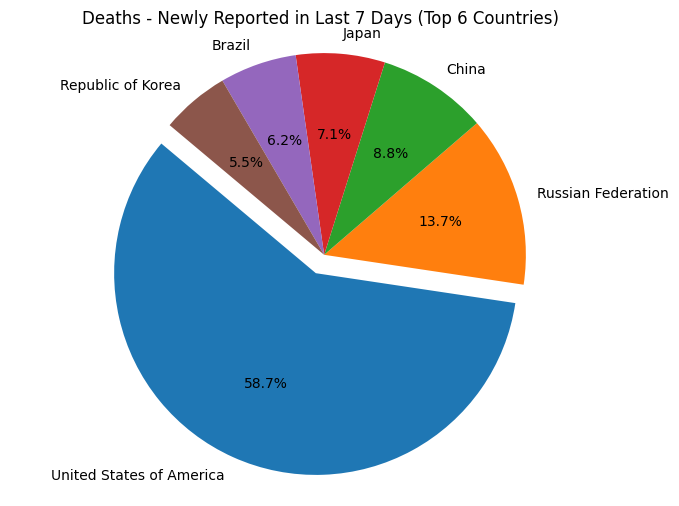

In [1]:
#question1:find out for Top  Countries Deaths - Newly Reported in Last 7 Days?
import pandas as pd
import matplotlib.pyplot as plt

# Read data from a CSV file
df = pd.read_csv('/content/sample_data/1. WHO-COVID-19-global-table-data.csv')

# Filter out rows with continent names and handle missing values
df = df[~df['COUNTRY'].str.contains('continent', case=False, na=False)]

# Sort the DataFrame by 'Deaths - newly reported in last 7 days' in descending order
df = df.sort_values(by='Deaths - newly reported in last 7 days', ascending=False)
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0', '#ffb3e6']

# Keep the top 6 countries
df = df.head(6)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Deaths - newly reported in last 7 days'] , labels=df['COUNTRY'], autopct='%1.1f%%',explode=(0.1, 0, 0, 0, 0, 0) ,startangle=140)
plt.title('Deaths - Newly Reported in Last 7 Days (Top 6 Countries)')
plt.subplots_adjust(bottom=0.3)

plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Show the pie chart
plt.show()


In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/sample_data/cases Dataset age-sex.csv'
df = pd.read_csv(file_path)

# Print column names to check
print("Column names in the DataFrame:", df.columns)

# Rest of your code...


FileNotFoundError: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/sample_data/1. WHO-COVID-19-global-table-data.csv')
df = pd.read_csv(file_path)
print(df.columns)


Index(['Country', 'Date_reported', 'age_group', 'age_begin', 'age_end',
       'casesF', 'casesM', 'populationin1000sF', 'populationin1000sM',
       'Unnamed: 9', 'WHO_region'],
      dtype='object')


<ipython-input-52-d00f510d7784>:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


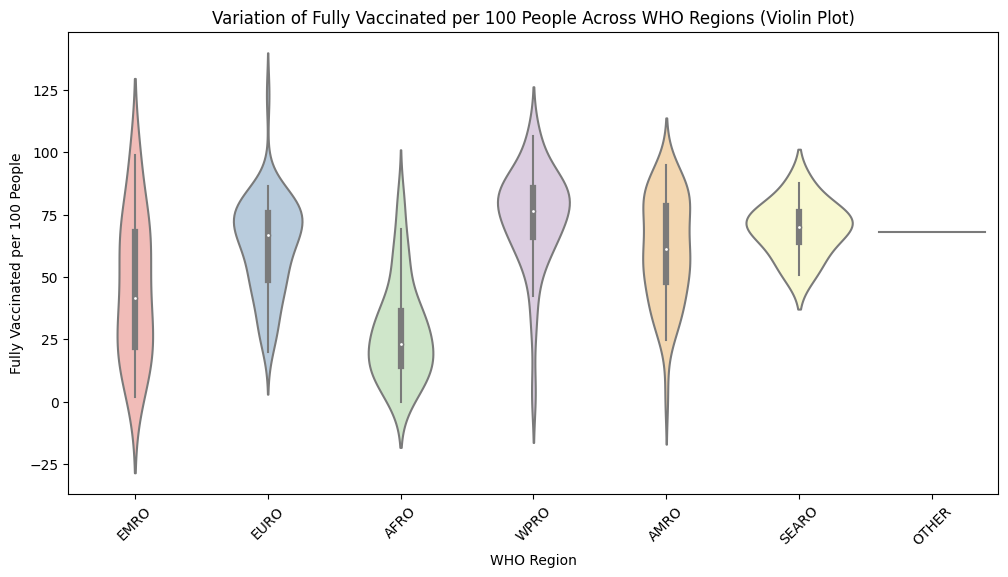

In [ ]:
#Question 2. How does the number of fully vaccinated individuals per 100 people vary across different WHO regions, visualized using a violin plot?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Read the data from a CSV file into a DataFrame
df = pd.read_csv('/content/sample_data/2. Vaccination-data.csv')

# Group the data by WHO regions and calculate the average fully vaccinated per 100 people
region_avg_fully_vaccinated = df.groupby('WHO_REGION')['PERSONS_FULLY_VACCINATED_PER100'].mean().sort_values()
# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='WHO_REGION', y='PERSONS_FULLY_VACCINATED_PER100', data=df, palette='Pastel1')
plt.xlabel('WHO Region')
plt.ylabel('Fully Vaccinated per 100 People')
plt.title('Variation of Fully Vaccinated per 100 People Across WHO Regions (Violin Plot)')
plt.xticks(rotation=45)
plt.show()



Enter a country name:
India


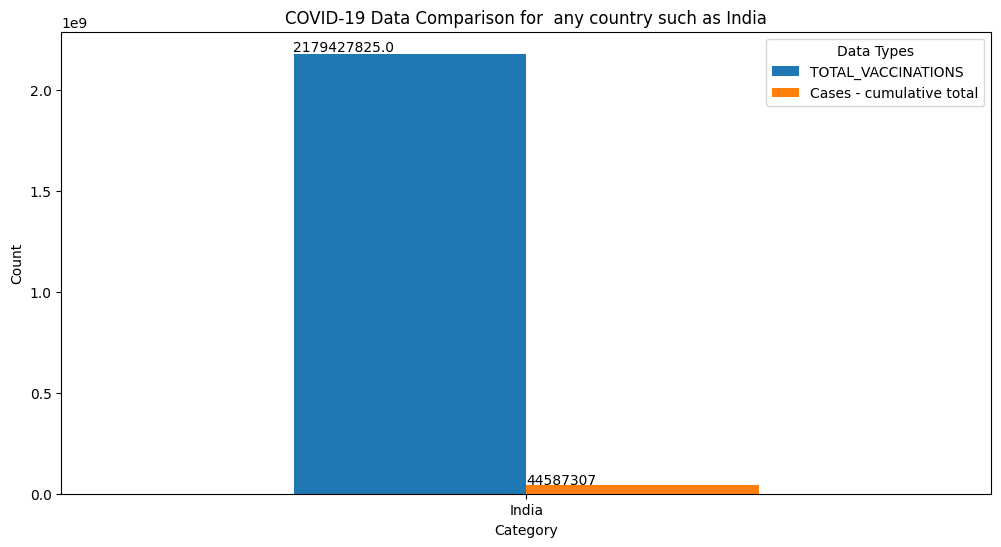

In [ ]:
#Question 3: How does comparing a country's total COVID-19 vaccinations with its total cumulative COVID-19 cases reveal insights, visualized using a bar chart and user need to input country name?
import pandas as pd
import matplotlib.pyplot as plt

# Read the COVID-19 data into a dataframe
covid_data = pd.read_csv('/content/sample_data/1. WHO-COVID-19-global-table-data.csv')
vaccination_data = pd.read_csv('/content/sample_data/2. Vaccination-data.csv')
merged_data = pd.merge(covid_data, vaccination_data)

# Take user input for the country name
# Display a message without a box and get user input
print("Enter a country name:")
country_name = input().strip()

# Filter data for the specified country and the specific columns
filtered_data = merged_data[merged_data['COUNTRY'] == country_name][['TOTAL_VACCINATIONS',
                                  'Cases - cumulative total']]

if not filtered_data.empty:
    # Create a bar chart to compare the two categories for the specified country
    plt.figure(figsize=(12, 6))
    ax = filtered_data.set_index(merged_data['COUNTRY'][filtered_data.index]).plot(kind='bar', ax=plt.gca())
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title(f'COVID-19 Data Comparison for  any country such as {country_name}')
    plt.xticks(rotation=0)
    plt.legend(title='Data Types')

    # Adding the text on the bars
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    plt.show()
else:
    print(f"No data found for {country_name}. Please check the country name or it may not have data for theA selected categories.")
# For this code user can chosse any country.i create a barcode for total vaacination vs  total covid-19 Cases cumulative and will help show the amount as well.

<ipython-input-5-4b26a3578526>:20: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='COUNTRY', y='PERSONS_FULLY_VACCINATED', data=top_vaccinated, palette='Set2', size=12)
<ipython-input-5-4b26a3578526>:28: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='COUNTRY', y='Cases - newly reported in last 7 days', data=top_cases, palette='Set2',size=12)


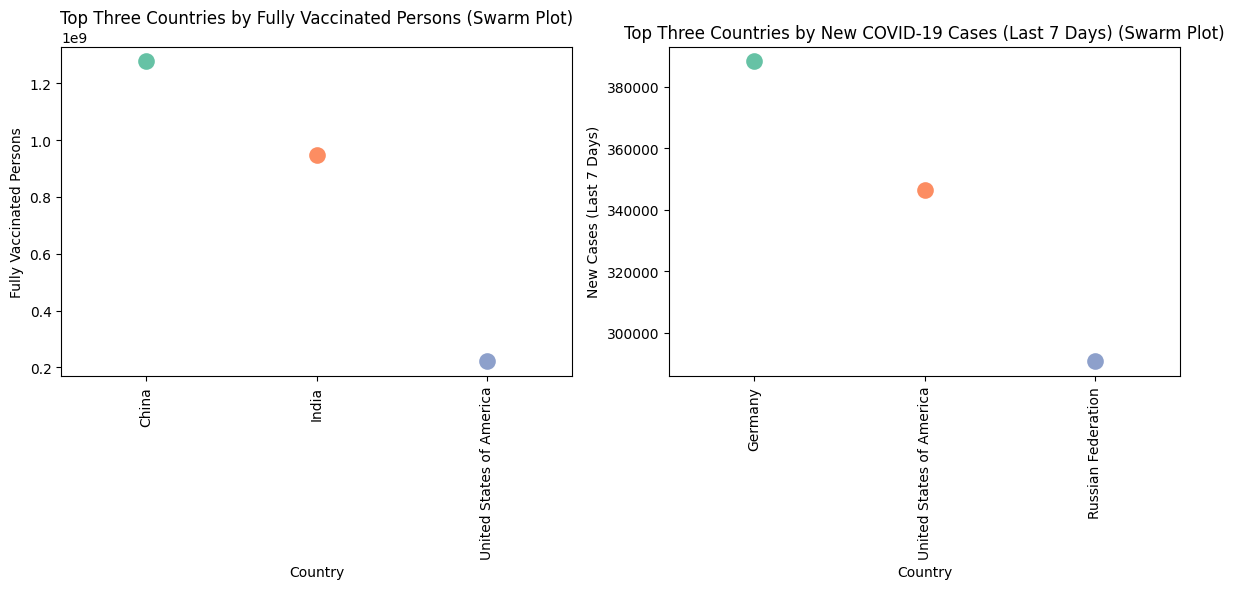

In [ ]:
#Question 4 : Which are the top three countries with the highest COVID-19 cases and the highest number of fully vaccinated individuals, visualized using a swarm plot?import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data into Pandas DataFrames
covid_data = pd.read_csv('/content/sample_data/1. WHO-COVID-19-global-table-data.csv')
vaccination_data = pd.read_csv('/content/sample_data/2. Vaccination-data.csv')

# Sort and find the top three vaccinated countries
top_vaccinated = vaccination_data.sort_values(by='PERSONS_FULLY_VACCINATED', ascending=False).head(3)

# Sort and find the top three countries with the highest COVID-19 cases reported
top_cases = covid_data.sort_values(by='Cases - newly reported in last 7 days', ascending=False).head(3)

# Create a figure with subplots
plt.figure(figsize=(12, 6))
dot_colors = ['#990000', '#FF6600', '#000099']
# Swarm plot for top vaccinated countries
plt.subplot(1, 2, 1)
sns.swarmplot(x='COUNTRY', y='PERSONS_FULLY_VACCINATED', data=top_vaccinated, palette='Set2', size=12)
plt.xlabel('Country')
plt.ylabel('Fully Vaccinated Persons')
plt.title('Top Three Countries by Fully Vaccinated Persons (Swarm Plot)')
plt.xticks(rotation=90)

# Swarm plot for top countries with new COVID-19 cases
plt.subplot(1, 2, 2)
sns.swarmplot(x='COUNTRY', y='Cases - newly reported in last 7 days', data=top_cases, palette='Set2',size=12)
plt.xlabel('Country')
plt.ylabel('New Cases (Last 7 Days)')
plt.title('Top Three Countries by New COVID-19 Cases (Last 7 Days) (Swarm Plot)')
plt.xticks(rotation=90)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()
# For this code i create two bar chart  for two different data . user can get idea for top three countris fully vaccinated and new covid  cases

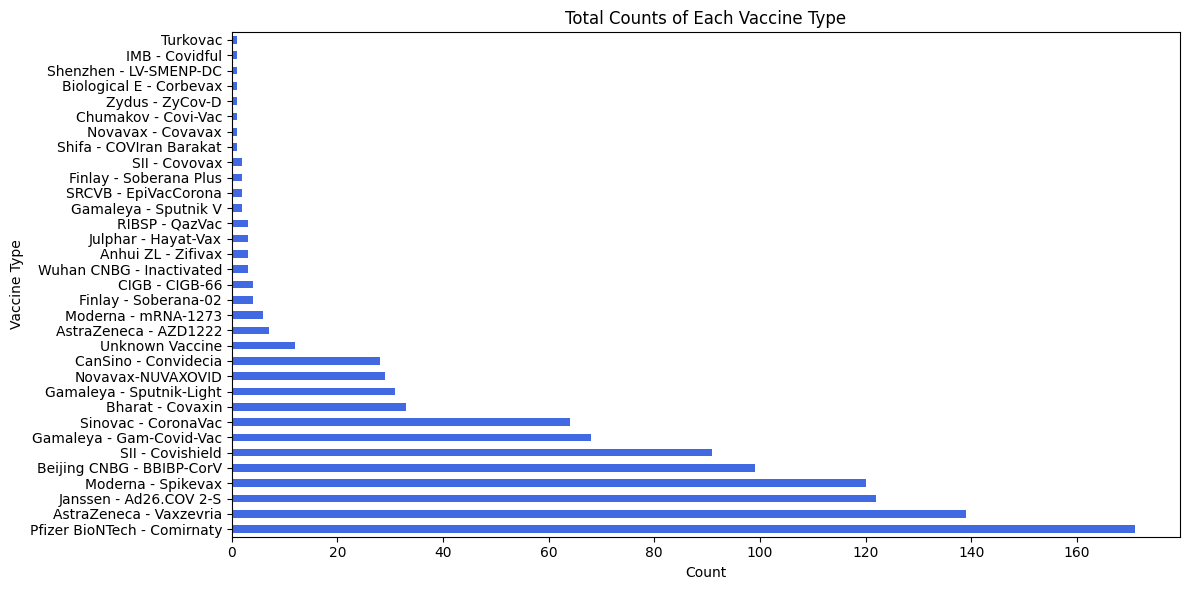

In [ ]:
# Question 5 : What are the total counts of each vaccine type used in the dataset?
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from a CSV file into a DataFrame
df = pd.read_csv('/content/sample_data/2. Vaccination-data.csv')

# Split and count the occurrences of each vaccine type
vaccine_counts = df['VACCINES_USED'].str.split(',').explode().str.strip().value_counts()

# Create a bar chart for visualization
vaccine_counts.plot(kind='barh', color='royalblue', figsize=(12, 6))
plt.xlabel('Count')
plt.ylabel('Vaccine Type')
plt.title('Total Counts of Each Vaccine Type')
plt.tight_layout()

# Show the bar chart
plt.show()


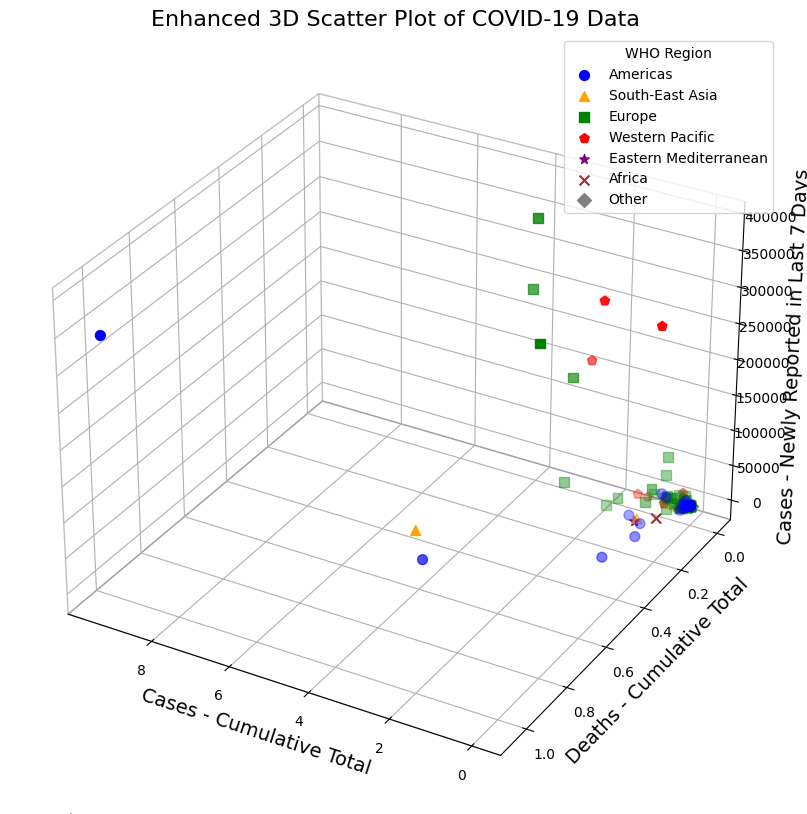

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load  dataset
df = pd.read_csv('/content/sample_data/1. WHO-COVID-19-global-table-data.csv')

cases_cumulative = df['Cases - cumulative total']
deaths_cumulative = df['Deaths - cumulative total']
cases_newly_reported = df['Cases - newly reported in last 7 days']
WHO_region = df['WHO Region']

# Define colors and markers for each WHO region
region_styles = {
    'Americas': ('blue', 'o'),
    'South-East Asia': ('orange', '^'),
    'Europe': ('green', 's'),
    'Western Pacific': ('red', 'p'),
    'Eastern Mediterranean': ('purple', '*'),
    'Africa': ('brown', 'x'),
    'Other': ('gray', 'D')
}

# Create a new figure for 3D plotting
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with varying color and marker
for region, (color, marker) in region_styles.items():
    region_data = df[WHO_region == region]
    ax.scatter(region_data['Cases - cumulative total'],
               region_data['Deaths - cumulative total'],
               region_data['Cases - newly reported in last 7 days'],
               color=color, marker=marker, s=50, label=region)

# Create a legend
ax.legend(loc='upper right', title="WHO Region")

# Labels and title with increased font size
ax.set_xlabel('Cases - Cumulative Total', fontsize=14)
ax.set_ylabel('Deaths - Cumulative Total', fontsize=14)
ax.set_zlabel('Cases - Newly Reported in Last 7 Days', fontsize=14)
ax.set_title('Enhanced 3D Scatter Plot of COVID-19 Data', fontsize=16)

# Customize grid and background
ax.grid(True)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('gray')
ax.yaxis.pane.set_edgecolor('gray')
ax.zaxis.pane.set_edgecolor('gray')

# Adjust initial view angle
ax.view_init(elev=30, azim=120)

# Show the plot
plt.show()


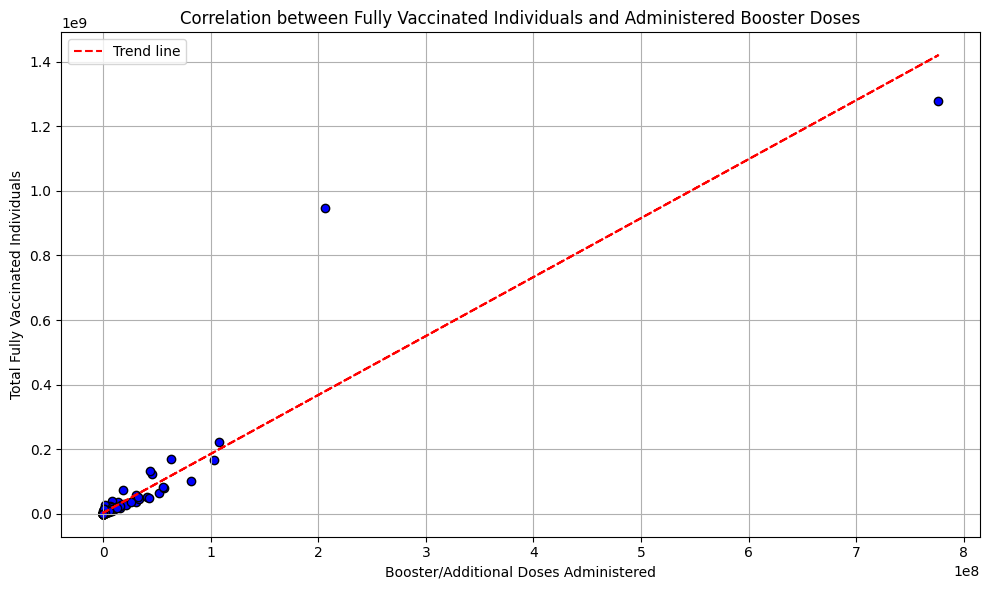

In [ ]:
#Question 6: What does the scatter plot and trend line in this visualization reveal about the correlation between the number of administered booster/additional doses and the total number of fully vaccinated individuals?
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from the CSV file into a DataFrame
df = pd.read_csv('/content/sample_data/2. Vaccination-data.csv')

# Filter out rows with missing data in 'PERSONS_FULLY_VACCINATED' and 'PERSONS_BOOSTER_ADD_DOSE'
df = df.dropna(subset=['PERSONS_FULLY_VACCINATED', 'PERSONS_BOOSTER_ADD_DOSE'])

# Extract the relevant columns
fully_vaccinated = df['PERSONS_FULLY_VACCINATED']
booster_doses = df['PERSONS_BOOSTER_ADD_DOSE']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(booster_doses, fully_vaccinated, alpha=1, color='blue', edgecolor='k')

# Add a trend line
z = np.polyfit(booster_doses, fully_vaccinated, 1)
p = np.poly1d(z)
plt.plot(booster_doses, p(booster_doses), "r--", label='Trend line')

# Enhance the plot with a grid, labels and a legend
plt.xlabel('Booster/Additional Doses Administered')
plt.ylabel('Total Fully Vaccinated Individuals')
plt.title('Correlation between Fully Vaccinated Individuals and Administered Booster Doses')
plt.legend()
plt.grid(True)

# Show the plot with tight layout
plt.tight_layout()
plt.show()


In [ ]:
S

Please select a feature to visualize by entering the number:
1. Cases - cumulative total per 100000 population
2. Cases - newly reported in last 7 days
3. Cases - newly reported in last 7 days per 100000 population
4. Cases - newly reported in last 24 hours
5. Deaths - cumulative total
6. Deaths - cumulative total per 100000 population
7. Deaths - newly reported in last 7 days
8. Deaths - newly reported in last 7 days per 100000 population
9. Deaths - newly reported in last 24 hours
Enter the number of the feature: 3


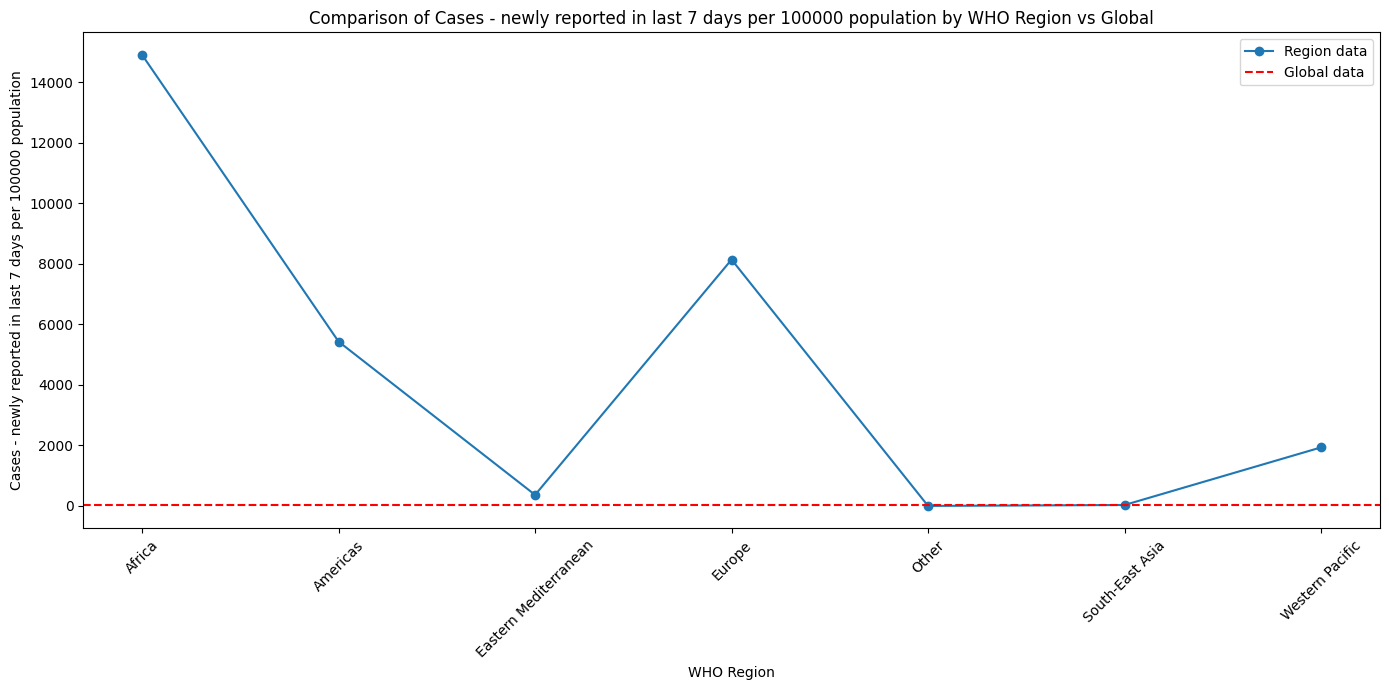

In [ ]:
#Question 7 : What does the line graph comparing the selected feature between global and WHO regions reveal about the differences and patterns in COVID-19 data?

import pandas as pd
import matplotlib.pyplot as plt
regional_df = pd.read_csv('/content/sample_data/1. WHO-COVID-19-global-table-data.csv')
global_df = pd.read_csv('/content/sample_data/global.csv')
# for user selection
print("Please select a feature to visualize by entering the number:")
features = global_df.columns[1:]  # for global data
for i, col in enumerate(features, 1):
    print(f"{i}. {col}")
# Ensure the input is a valid number
try:
    feature_index = int(input("Enter the number of the feature: ")) - 1  # Subtract 1 because enumeration starts at 1
    feature = features[feature_index]
except (IndexError, ValueError):
    print("Invalid selection. Exiting program.")
    exit()
# Group regional data by 'WHO Region' and sum the selected feature
region_grouped_data = regional_df.groupby('WHO Region')[feature].sum()

# Extract the global data for the selected feature
global_data = global_df[feature].iloc[0]

# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(region_grouped_data.index, region_grouped_data.values, marker='o', linestyle='-', label='Region data')
plt.axhline(y=global_data, color='r', linestyle='--', label='Global data')
plt.title(f'Comparison of {feature} by WHO Region vs Global')
plt.xlabel('WHO Region')
plt.ylabel(feature)
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust plot to fit into the figure area
plt.show()
